In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate, cross_val_score, validation_curve, RandomizedSearchCV
from sklearn.impute import SimpleImputer # eksik veriler için
import warnings
warnings.filterwarnings("ignore")


# Classifier için kullanılacak modüller 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [42]:
df = pd.read_excel("FinalData.xlsx", index_col = "Name")

In [43]:
df.head()

,Time,Rating,Episodes,Seasons,main_cat,bitis,year,category_size,stars_size,publisher_organization_size,...,baslangic_cat,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating
Name,,,,,,,,,,,,,,,,,,,,,
As If,30,9.0,30,3,4,0,2021,1,4,1,...,8,1,1,9.000,8.600,8.500,4.782,9.000,8.375,6.147
Sen Çal Kapimi,120,7.1,52,2,4,2021,2020,2,4,12,...,8,2,5,5.982,6.663,6.501,6.927,6.419,6.330,6.130
Kurulus: Osman,120,7.5,108,4,0,0,2019,3,4,2,...,7,0,5,7.054,7.325,7.208,5.399,7.412,6.833,6.514
Dirilis: Ertugrul,120,7.9,179,5,0,2019,2014,3,4,27,...,6,2,6,6.747,6.562,7.329,7.395,7.150,7.120,6.514
Çekiç ve Gül: Bir Behzat Ç. Hikayesi,45,9.1,2,1,0,0,2022,1,4,1,...,8,1,1,8.300,7.040,7.900,6.489,8.067,6.222,8.950


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, As If to Bir Resim Bir Hikaye
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time                              2229 non-null   int64  
 1   Rating                            2229 non-null   float64
 2   Episodes                          2229 non-null   int64  
 3   Seasons                           2229 non-null   int64  
 4   main_cat                          2229 non-null   int64  
 5   bitis                             2229 non-null   int64  
 6   year                              2229 non-null   int64  
 7   category_size                     2229 non-null   int64  
 8   stars_size                        2229 non-null   int64  
 9   publisher_organization_size       2229 non-null   int64  
 10  musics_size                       2229 non-null   int64  
 11  exported_countries_size           2229 non-null   int6

In [45]:
df.drop("Rating", axis = 1, inplace = True)
df.head()

,Time,Episodes,Seasons,main_cat,bitis,year,category_size,stars_size,publisher_organization_size,musics_size,...,baslangic_cat,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating
Name,,,,,,,,,,,,,,,,,,,,,
As If,30,30,3,4,0,2021,1,4,1,2,...,8,1,1,9.000,8.600,8.500,4.782,9.000,8.375,6.147
Sen Çal Kapimi,120,52,2,4,2021,2020,2,4,12,3,...,8,2,5,5.982,6.663,6.501,6.927,6.419,6.330,6.130
Kurulus: Osman,120,108,4,0,0,2019,3,4,2,3,...,7,0,5,7.054,7.325,7.208,5.399,7.412,6.833,6.514
Dirilis: Ertugrul,120,179,5,0,2019,2014,3,4,27,5,...,6,2,6,6.747,6.562,7.329,7.395,7.150,7.120,6.514
Çekiç ve Gül: Bir Behzat Ç. Hikayesi,45,2,1,0,0,2022,1,4,1,1,...,8,1,1,8.300,7.040,7.900,6.489,8.067,6.222,8.950


Text(0.5, 1.0, 'Korelasyon Isı Haritası')

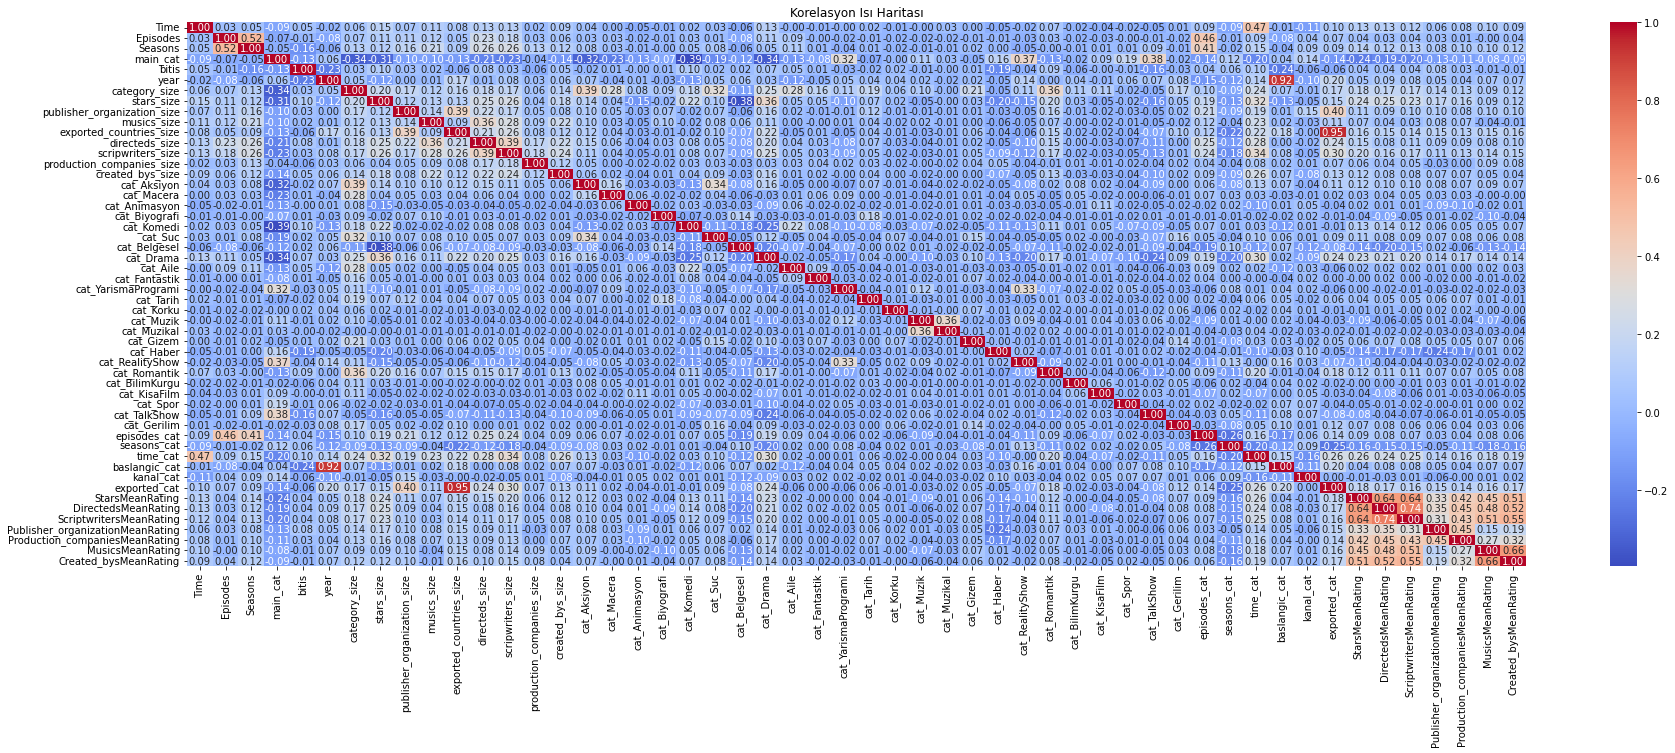

In [46]:
correlation = df.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(correlation, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Korelasyon Isı Haritası")

<AxesSubplot:>

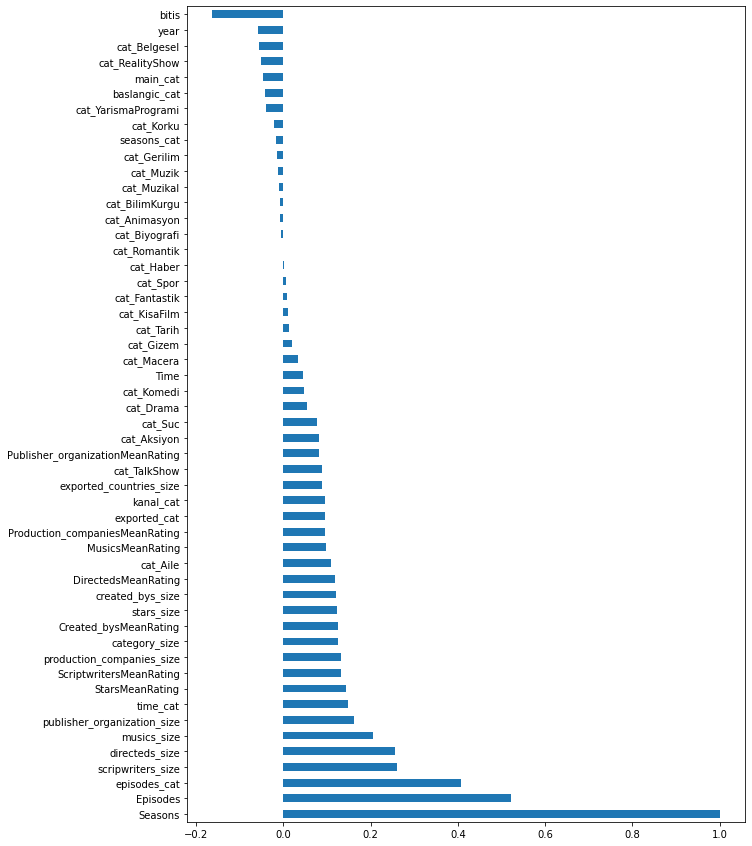

In [47]:
plt.figure(figsize=(10,15))
correlation.sort_values(by="Seasons", ascending=False).iloc[0].sort_values(ascending=False).plot(kind="barh")


In [48]:
train = pd.read_excel("train_data.xlsx", index_col = "Name")
test = pd.read_excel("test_data.xlsx", index_col = "Name")

In [49]:
train.drop("bitis", axis=1, inplace=True)
train.drop("bittimi", axis=1, inplace=True)
train.drop("Rating", axis=1, inplace=True)
print("Train Size:", len(train))
train.head()

Train Size: 1954


,Time,Episodes,main_cat,year,category_size,stars_size,publisher_organization_size,musics_size,exported_countries_size,directeds_size,...,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating,Seasons
Name,,,,,,,,,,,,,,,,,,,,,
Sen Çal Kapimi,120,52,4,2020,2,4,12,3,13,3,...,2,5,5.982,6.663,6.501,6.927,6.419,6.330,6.130,2
Dirilis: Ertugrul,120,179,0,2014,3,4,27,5,18,3,...,2,6,6.747,6.562,7.329,7.395,7.150,7.120,6.514,5
Çukur,120,132,0,2017,3,4,3,1,10,2,...,2,5,7.062,7.175,6.358,6.637,6.843,6.975,6.884,4
The Protector,40,32,0,2018,3,4,1,2,34,5,...,1,8,6.247,6.753,6.199,7.196,6.672,7.140,6.665,4
Behzat Ç.: Bir Ankara Polisiyesi,90,105,5,2010,3,4,2,5,2,5,...,2,1,7.905,6.411,7.103,6.094,7.207,7.007,8.950,4


In [50]:
test.drop("bitis", axis=1, inplace=True)
test.drop("bittimi", axis=1, inplace=True)
test.drop("Rating", axis=1, inplace=True)
print("Test Size:", len(test))
test.head()

Test Size: 275


,Time,Episodes,main_cat,year,category_size,stars_size,publisher_organization_size,musics_size,exported_countries_size,directeds_size,...,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating,Seasons
Name,,,,,,,,,,,,,,,,,,,,,
As If,30,30,4,2021,1,4,1,2,1,2,...,1,1,9.000,8.600,8.500,4.782,9.000,8.375,6.147,3
Kurulus: Osman,120,108,0,2019,3,4,2,3,12,3,...,0,5,7.054,7.325,7.208,5.399,7.412,6.833,6.514,4
Çekiç ve Gül: Bir Behzat Ç. Hikayesi,45,2,0,2022,1,4,1,1,1,1,...,1,1,8.300,7.040,7.900,6.489,8.067,6.222,8.950,1
Yargi,150,44,7,2021,1,4,1,1,9,2,...,0,4,6.699,7.405,5.785,5.530,6.843,7.750,6.884,2
Yali Çapkini,120,13,7,2022,2,4,2,2,12,2,...,2,5,6.121,6.467,6.333,6.064,6.291,6.071,5.760,1


# Dependent - Independent Variables

In [51]:
X_df = train.drop("Seasons" , axis = 1)
y_df = train.loc[:, "Seasons"]

In [52]:
X = train.drop("Seasons" , axis = 1).values # bağımsız değişkenler
y = train.loc[:, "Seasons"].values # bağımlı değişkenler

In [53]:
# X_train_not_nor, X_test_not_nor = train_test_split(train, test_size = 0.2, random_state = 100)

# X_train_not_nor.to_csv("X_train_Not_Normalize.csv", index = "Name")
# X_test_not_nor.to_csv("X_test_Not_Normalize.csv", index = "Name")

In [54]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()

# train_normalized = mms.fit_transform(train)
# df_norm = pd.DataFrame(train_normalized)

# X_train_nor, X_test_nor = train_test_split(df_norm, test_size = 0.2, random_state = 100)

# X_train_nor.to_csv("X_train_Normalize.csv", index = "Name")
# X_test_nor.to_csv("X_test_Normalize.csv", index = "Name")


# Train - Test Splitting

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))

X_train: 1563
X_test: 391
y_train: 1563
y_test: 391


# Normalization

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classification

In [57]:
def evaluate_model(dtc_model, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred):        
    print("Train Data Accuracy", accuracy_score(y_train_pred, y_train) * 100)
    print("Train Cross Validation Score:", cross_val_score(estimator=dtc_model, X=X_train, y=y_train, cv=10).mean() * 100)
    print("Train Cross Validation Standart Sapma:", cross_val_score(estimator=dtc_model, X=X_train, y=y_train, cv=10).std ())
    print("Train Data R2 Score:", r2_score(y_train_pred, y_train) * 100)
    print("Train Data Mean Squared Error:", mean_squared_error(y_train_pred, y_train) * 100)
    print("Train Confusion Matrix\n\n", confusion_matrix(y_train_pred, y_train))
    print("Train Classification Report\n\n", classification_report(y_train_pred, y_train))

    print("*" * 50)

    print("Test Data Accuracy", accuracy_score(y_test_pred, y_test) * 100)
    print("Test Cross Validation Score:", cross_val_score(estimator=dtc_model, X=X_test, y=y_test, cv=10).mean() * 100)
    print("Test Cross Validation Standart Sapma:", cross_val_score(estimator=dtc_model, X=X_test, y=y_test, cv=10).std ())
    print("Test Data R2 Score:", r2_score(y_test_pred, y_test) * 100)
    print("Test Data Mean Squared Error:", mean_squared_error(y_test_pred, y_test) * 100)
    print("Test Confusion Matrix\n\n", confusion_matrix(y_test_pred, y_test))
    print("Test Classification Report\n\n", classification_report(y_test_pred, y_test))



In [58]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

y_train_pred = dtc_model.predict(X_train)
y_test_pred = dtc_model.predict(X_test)

evaluate_model(dtc_model, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)

Train Data Accuracy 100.0
Train Cross Validation Score: 93.98742446513147
Train Cross Validation Standart Sapma: 0.016676094730948495
Train Data R2 Score: 100.0
Train Data Mean Squared Error: 0.0
Train Confusion Matrix

 [[1199    0    0    0    0    0    0    0    0    0    0    0]
 [   0  254    0    0    0    0    0    0    0    0    0    0]
 [   0    0   59    0    0    0    0    0    0    0    0    0]
 [   0    0    0   22    0    0    0    0    0    0    0    0]
 [   0    0    0    0   11    0    0    0    0    0    0    0]
 [   0    0    0    0    0    7    0    0    0    0    0    0]
 [   0    0    0    0    0    0    3    0    0    0    0    0]
 [   0    0    0    0    0    0    0    2    0    0    0    0]
 [   0    0    0    0    0    0    0    0    3    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1]]
Train Classification R

In [59]:
y_test_pred

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 6, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 6, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,

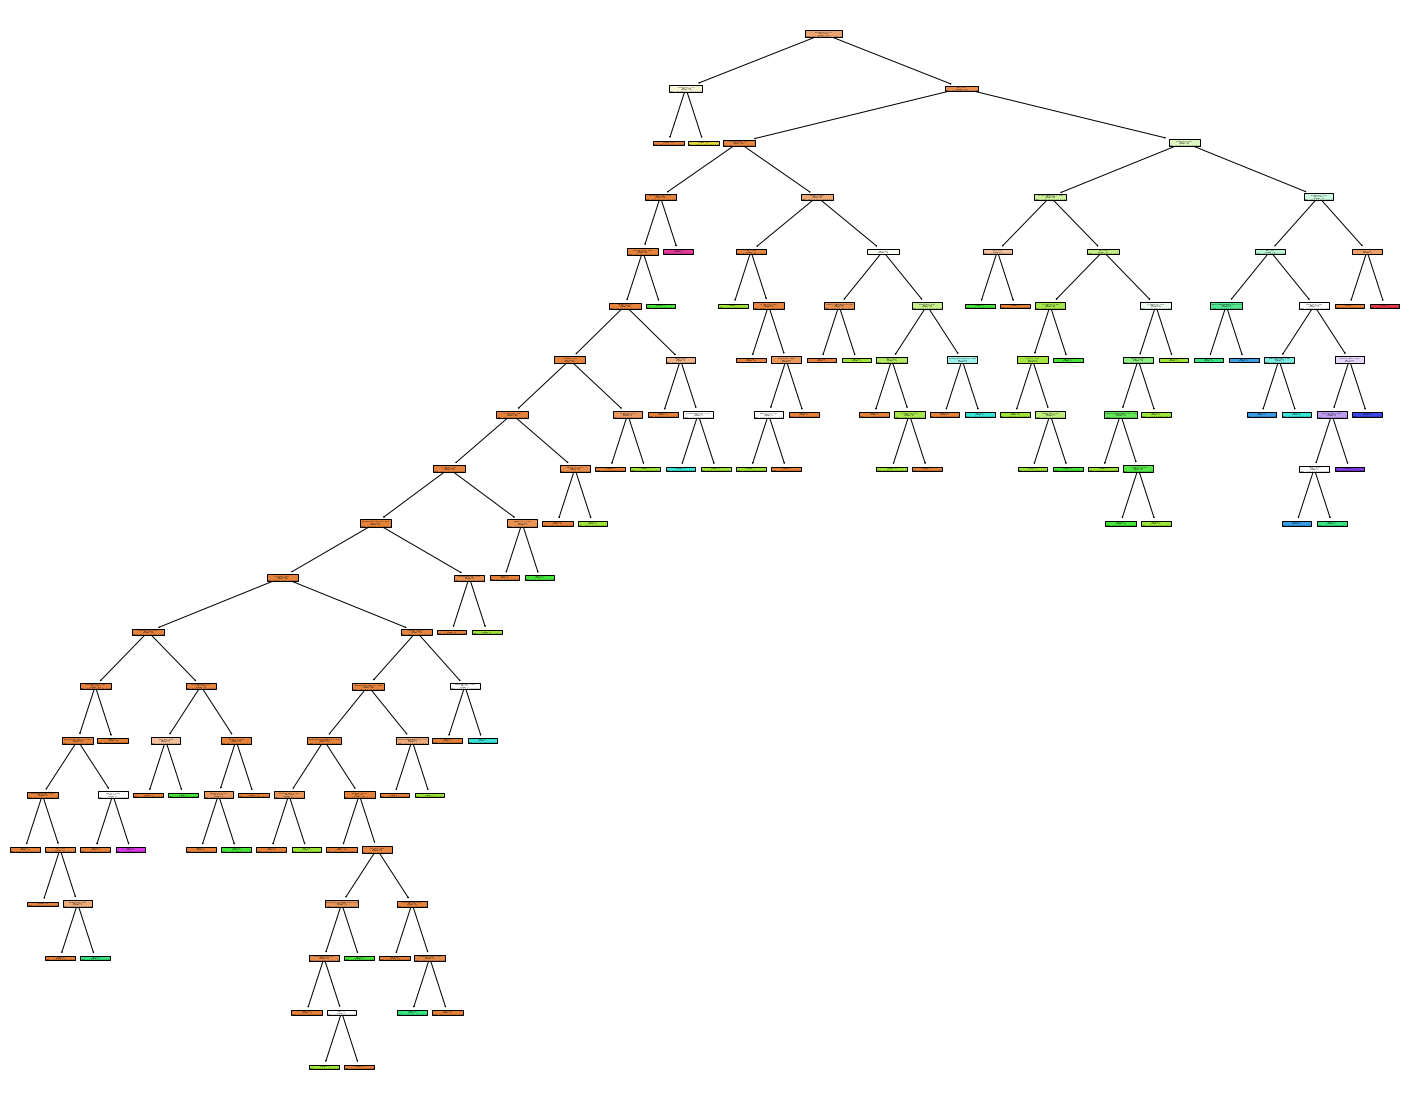

In [60]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_model,
                   feature_names=X_df.columns,
                   filled=True)

# Hyperparameters

In [61]:
dtc_params = {
    'criterion': ['gini', 'entropy'],
    "max_depth": list(range(1, 100, 5)),
    "min_samples_split": list(range(1,100, 10)),
    'min_samples_leaf': range(1,100, 10)
}

dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, dtc_params, cv=10, n_jobs=-1, verbose=2)
dtc_cv.fit(X_train, y_train)


Fitting 10 folds for each of 4000 candidates, totalling 40000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51,
                                       56, 61, 66, 71, 76, 81, 86, 91, 96],
                         'min_samples_leaf': range(1, 100, 10),
                         'min_samples_split': [1, 11, 21, 31, 41, 51, 61, 71,
                                               81, 91]},
             verbose=2)

In [62]:
dtc_tuned = DecisionTreeClassifier(**dtc_cv.best_params_)
dtc_tuned.fit(X_train, y_train)

y_train_pred = dtc_tuned.predict(X_train)
y_test_pred = dtc_tuned.predict(X_test)

evaluate_model(dtc_model, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)


Train Data Accuracy 98.1445937300064
Train Cross Validation Score: 93.85962763351297
Train Cross Validation Standart Sapma: 0.026022336676609806
Train Data R2 Score: 77.19816379327114
Train Data Mean Squared Error: 20.153550863723606
Train Confusion Matrix

 [[1195    0    7    2    0    0    0    0    0    0    0    1]
 [   0  254    0    0    0    0    0    0    0    0    0    0]
 [   3    0   51    4    0    2    0    0    0    0    0    0]
 [   1    0    1   16    0    0    0    0    0    0    0    0]
 [   0    0    0    0   10    2    1    0    0    0    0    0]
 [   0    0    0    0    0    3    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    1    2    3    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0  

In [40]:
import pandas as pd


def calculate_ratings2(categoryName, kadroName):
  df_edit = pd.read_excel("the_all.xlsx")
  
  list_2 = [num if isinstance(num, (str)) else "" for num in df_edit[categoryName]]

  stars_list = []
  stars_list_as_a_group = []

  for i in list_2:
    kisiler = i.split(",")
    stars_list_as_a_group.append(kisiler) # o dizideki oyuncuların isimlerinin olduğu liste

    for kisi in kisiler:
      if kisi not in stars_list:
        stars_list.append(kisi) # sadece oyuncu isimlerin olduğu liste

  ########################################################

  start_and_times = []
  for star in stars_list:
    counter = 0
    for j in stars_list_as_a_group:
      if star in j:
        counter += 1
    start_and_times.append([star, counter]) # dizideki oyuncunun toplamda kaç dizide oynadığının sayısını alırız

  ########################################################

  index = []
  for i in range(len(list_2)):
    for kisi in stars_list:
      if kisi in list_2[i] and kisi != '':
        index.append([kisi, i]) # dizideki oyuncunun kaçıncı indexlerde geçtiğini aldığımız kısım

  ########################################################

  df_edit["Rating"] = df_edit["Rating"].fillna(0)
  df_edit["Rating"] = df_edit["Rating"].replace("", 0)

  oyuncuların_rating_ort = []

  for j in stars_list:
    oyuncu_rating = 0
    counter = 0

    for i in range(len(index)):
      try:
        if j == index[i][0] and df_edit.loc[index[i][1], "Rating"] != 0:
          counter += 1
          oyuncu_rating += df_edit.loc[index[i][1], "Rating"] # oyuncunun oynadığı bütün dizilerdeki rating ini al ve sürekli topla

      except:
        oyuncuların_rating_ort.append([index[i][0], 0])
      
    try:
      oyuncuların_rating_ort.append([j, (oyuncu_rating / counter)]) # toplanan rating i oyunucunun oynadığı film sayısına böl ve o oyuncunun ortalama ratingini bulmuş ol
    except:
      oyuncuların_rating_ort.append([j, 0])


  result = 0
  for i in kadroName.split(","):
    for kisi in range(len(oyuncuların_rating_ort)):
      if oyuncuların_rating_ort[kisi][0] == i:
        result += oyuncuların_rating_ort[kisi][1]


  return round((result / len(kadroName)), 3)


In [324]:
def verileriAl():
    for i in range(1):
        isim = input("Dizinin adı:")
        full_tarih = input("Dizinin başlangıç ve bitiş tarihi (eğer bitmemişse ör: 2022-):")
        zaman = int(input("Dizinin zamanı(dakika):"))
        kategori = input("Dizinin kategorisi:")
        rating = float(input("Dizinin puanı(IMDB):"))
        oyuncular = input("Dizinin oyuncuları:")
        bolum = int(input("Dizinin kaç bölüm sürdüğü:"))
        sezon = int(input("Dizinin sezon sayısı:"))
        yonetmen = input("Dizinin yönetmeni:")
        yazar = input("Dizinin yazarları:")
        cikis_tarih = input("Dizinin ilk çıkış tarihi:")
        yapim_sirketi = input("Dizinin yapım şirketi:")
        platform = input("Dizinin hangi platformda yayınlandığı:")
        muzik = input("Dizinin müziklerini yapanlar:")
        yapanlar = input("Dizinin kimler tarafından yapıldığı:")
        ulkeler = input("Dizinin hangi ülkelerde yayınlandığı:")

        dateList = full_tarih.split("-")
        my_df = df[df.loc[:, "year"] < int(dateList[0])] # Girilen tarihe göre dataframe oluşturma
        print("Yeni df boyutu:", len(my_df))

        main_cat = kategori.split(",")[0]
        bitis = int(dateList[1]) if dateList[1] != "" else 0
        year = int(dateList[0])
        baslangic = int(dateList[0])
        category_size = len(kategori.split(","))
        stars_size = len(oyuncular.split(","))
        publisher_organization_size = len(yapim_sirketi.split(","))
        musics_size = len(muzik.split(","))
        exported_countries_size = len(ulkeler.split(","))
        directeds_size = len(yonetmen.split(","))
        scripwriters_size = len(yazar.split(","))
        production_companies_size = len(yapim_sirketi.split(","))
        created_bys_size = len(yapanlar.split(","))

        for i in kategori.split(","):  
                cat_Aksiyon = 1 if "Action" in i else 0        
                cat_Macera = 1 if "Adventure" in i else 0        
                cat_Animasyon = 1 if "Animation" in i else 0 
                cat_Biyografi = 1 if "Biography" in i else 0        
                cat_Komedi = 1 if "Comedy" in i else 0        
                cat_Suc = 1 if "Crime" in i else 0        
                cat_Belgesel = 1 if "Documentary" in i else 0        
                cat_Drama = 1 if "Drama" in i else 0        
                cat_Aile = 1 if "Family" in i else 0        
                cat_Fantastik = 1 if "Fantasy" in i else 0        
                cat_YarismaProgrami = 1 if "Game-Show" in i else 0        
                cat_Tarih = 1 if "History" in i else 0        
                cat_Korku = 1 if "Horror" in i else 0        
                cat_Muzik = 1 if "Music" in i else 0        
                cat_Muzikal = 1 if "Musical" in i else 0        
                cat_Gizem = 1 if "Mystery" in i else 0        
                cat_Haber = 1 if "News" in i else 0        
                cat_RealityShow = 1 if "Reality-TV" in i else 0        
                cat_Romantik = 1 if "Romance" in i else 0        
                cat_BilimKurgu = 1 if "Sci-Fi" in i else 0        
                cat_KisaFilm = 1 if "Short" in i else 0        
                cat_Spor = 1 if "Sport" in i else 0        
                cat_TalkShow = 1 if "Talk-Show" in i else 0        
                cat_Gerilim = 1 if "Thriller" in i else 0        


                main_cat = [    0 if main_cat == 'Action'  
                                else 1 if main_cat == 'Adventure'  
                                else 2 if main_cat == 'Animation'  
                                else 3 if main_cat == 'Biography'  
                                else 4 if main_cat == 'Comedy'  
                                else 5 if main_cat == 'Crime'  
                                else 6 if main_cat == 'Documentary' 
                                else 7 if main_cat == 'Drama' 
                                else 8 if main_cat == 'Family' 
                                else 9 if main_cat == 'Fantasy' 
                                else 10 if main_cat == 'Game' 
                                else 11 if main_cat == 'History' 
                                else 12 if main_cat == 'Horror' 
                                else 13 if main_cat == 'Music' 
                                else 14 if main_cat == 'Musical' 
                                else 15 if main_cat == 'Mystery' 
                                else 16 if main_cat == 'News' 
                                else 17 if main_cat == 'Reality' 
                                else 18 if main_cat == 'Romance' 
                                else 19 if main_cat == 'Sci-Fi' 
                                else 20 if main_cat == 'Short' 
                                else 21 if main_cat == 'Sport' 
                                else 22 if main_cat == 'Talk-Show' 
                                else 23 if main_cat == 'Thriller' 
                                else 24
                                ][0]


                episodes_cat = [0 if int(bolum)==0 
                                else 0 if int(bolum)>0 and int(bolum) < 5
                                else 1 if int(bolum) < 10 
                                else 2 if int(bolum) < 20 
                                else 3 if int(bolum) < 30 
                                else 4 if int(bolum) < 40 
                                else 5 if int(bolum) < 50 
                                else 6 if int(bolum) < 60
                                else 7 
                                ][0]

                seasons_cat = [ 0 if int(sezon) == 1 # Failed
                                else 1 if int(sezon) == 2 # Semi-Success
                                else 2 if int(sezon) < 5   # Success
                                else 3 if int(sezon) < 10 # Semi-Matured
                                else 4 # Matured
                                ][0]

                time_cat = [    0 if int(zaman)==0
                                else 1 if int(zaman)>0 and int(zaman) < 20
                                else 2 if int(zaman) < 30
                                else 3 if int(zaman) < 60
                                else 4 if int(zaman) < 90
                                else 5 if int(zaman) < 120
                                else 6
                                ][0]


                baslangic_cat = [       0 if int(baslangic) < 1970
                                        else 1 if int(baslangic) < 1980
                                        else 2 if int(baslangic) < 1990
                                        else 3 if int(baslangic) < 2000
                                        else 4 if int(baslangic) < 2005
                                        else 5 if int(baslangic) < 2010
                                        else 6 if int(baslangic) < 2015
                                        else 7 if int(baslangic) < 2020
                                        else 8
                                ][0]


                yerel = ["Star TV".upper(), "Show TV".upper(), "Atv".upper(), "Kanal D".upper(), "Kanal 7".upper(), "TV8".upper(),"360".upper(), "FOX".upper(), "TVem".upper(), "Beyaz TV".upper(), "Uçankuş".upper(), "Trt".upper(), "Trt1".upper(),"beyaz tv".upper(), "tv 360".upper(), "tele 1".upper(), "tlc tv".upper(), "tlc".upper(), "dmax".upper(),"tv8,5".upper(), "a2".upper(), "teve2".upper(), "cine5".upper(), "cem tv".upper(), "uçankuş tv".upper(),"fashion one tv".upper(), "euro star".upper(), "euro d".upper(), "show Türk".upper(), "tv8 İnt".upper(), "kanal 7 avrupa".upper(),"woman tv".upper(), "ulusal kanal".upper(), "bengütürk".upper(), "tgrt eu".upper(), "show max".upper(), "stk tv".upper(),"euro90 tv".upper(), "tv4".upper(), "düğün".upper(), "tv em".upper(), "tv O".upper(), "kanal b".upper(),"sat 7 Türk".upper(), "yol".upper(), "üniversite".upper(), "üniversite tv".upper(), "meteoroloji tv".upper(), "tek rumeli tv".upper(),"afrika ntr".upper(), "akıllı tv".upper(), "günaydın tv".upper(), "tivi 6".upper(),'TRT', 'TRT 1', 'TRT 1 TÜRK SINEMASI', 'TRT 1,EFLATUN FILM', 'TRT 1,TRT 0,TRT DIJITAL', 'TRT 1,TRT DIJITAL', 'TRT 1,TURKISH RADIO & TELEVISION (TRT)', 'TRT 2', 'TRT BELGESEL', 'TRT DIJITAL', 'TRT HABER', 'TRT OKUL', 'TRT TURK', 'TRT WORLD', 'TRT,FUJIFILM TURKIYE', 'TRT,TRT 2', 'TURKISH RADIO & TELEVISION (TRT)', 'TURKISH RADIO & TELEVISION (TRT),PLANET ÇOCUK,SHOW TV', 'TURKISH RADIO & TELEVISION (TRT),TGRT', 'TURKISH RADIO & TELEVISION (TRT),TRT ÇOCUK', 'TURKMAX', 'TV+', 'TV100','TVNET', 'US YAPIM', 'UÇANKUS TV', 'A HABER', 'AKIT TV', 'AKSOY FILM', 'AY YAPIM', 'BKM', 'CNN TÜRK', 'HABER GLOBAL', 'D-SMART','FERGÜN YAPIM', 'FINCAN MEDYA', 'FLASH TV', 'FORA FILM', 'BI YAPIM', 'GEEKYAPAR!',  'HAN MEDYA YAPIM', 'HANEDAN FILM', 'KANAL 1', 'LIMON YAPIM', 'MART AJANS', 'MED YAPIM', 'MEDYAPIM','MEGA' 'KLAN TV', 'MELTEM TV', 'MERBAR YAPIM', 'MERSIN EMNIYET MÜDÜRLÜGÜ', 'MIHVER PRODUKSIYON', 'MILLIYET', 'NTV', 'SAMANYOLU TV (STV)', 'STV','VIZYON', 'EFLATUN FILM', 'PERVE TV', 'SURAT BASIM YAYIN', 'TGRT', 'ÖZER YAPIM', 'ÖZGÜR DOGRUÖZ FILM', 'ÜLKE TV', 'MEGAFON TV']        
                internet = ["blutv".upper(), "disney plus".upper(), "disney+".upper(), "tod".upper(), "exxen".upper(), "netflix".upper(), "gain".upper(),"amazon prime video".upper(), "amazon prime".upper(), "puhu tv".upper(), "Bein Connect".upper(), "MUBI".upper(), "FOXPlay".upper(), "Filmbox Live".upper(),"D-Smart GO".upper(), "Turkcell TV Plus".upper(), "Tivibu".upper(), "YouTube".upper()]
                kanal_cat = [ 0 if platform in yerel
                        else 1 if platform in internet
                        else 2
                        ][0]

                exported_cat = [ 0 if len(ulkeler.split(",")) < 1
                                else 1 if len(ulkeler.split(",")) < 3
                                else 2 if len(ulkeler.split(",")) < 5
                                else 3 if len(ulkeler.split(",")) < 7
                                else 4 if len(ulkeler.split(",")) < 10
                                else 5 if len(ulkeler.split(",")) < 15
                                else 6 if len(ulkeler.split(",")) < 20
                                else 7 if len(ulkeler.split(",")) < 30
                                else 8 
                                ][0]

                StarsMeanRating = calculate_ratings2("Stars", oyuncular)
                DirectedsMeanRating = calculate_ratings2("Directeds", yonetmen)
                ScriptwritersMeanRating = calculate_ratings2("Scriptwriters", yazar)
                Publisher_organizationMeanRating = calculate_ratings2("Publisher_organization", platform)
                Production_companiesMeanRating = calculate_ratings2("Production_companies", yapim_sirketi)
                MusicsMeanRating = calculate_ratings2("Musics", muzik)
                Created_bysMeanRating = calculate_ratings2("Created_bys", yapanlar)

                bittimi = 1 if bitis != 0 else 0 

        #######################################################################
        # from tensorflow import keras
        # modelx = keras.models.load_model(r'C:\Users\batu_\OneDrive\Belgeler\GitHub\DataMiningIMDB\model.keras')

        my_X_test = np.array([zaman, bolum, main_cat,\
                bitis, year, category_size, stars_size, publisher_organization_size, musics_size,\
                exported_countries_size, directeds_size, scripwriters_size, production_companies_size, created_bys_size,\
                cat_Aksiyon, cat_Macera, cat_Animasyon, cat_Biyografi, cat_Komedi, cat_Suc, cat_Belgesel, cat_Drama, cat_Aile, cat_Fantastik,\
                cat_YarismaProgrami, cat_Tarih, cat_Korku, cat_Muzik, cat_Muzikal, cat_Gizem, cat_Haber, cat_RealityShow, cat_Romantik,\
                cat_BilimKurgu, cat_KisaFilm, cat_Spor, cat_TalkShow, cat_Gerilim,\
                episodes_cat, seasons_cat, time_cat, baslangic_cat, kanal_cat,\
                StarsMeanRating, DirectedsMeanRating, ScriptwritersMeanRating, Publisher_organizationMeanRating,\
                Production_companiesMeanRating, MusicsMeanRating, Created_bysMeanRating]).reshape(1, -1)
        
        pd.DataFrame(my_X_test).to_csv("my_X_test.csv", index="Name")

        y_test_pred = dtc_model.predict(my_X_test)
        sonuc = y_test_pred[0] 
        if sonuc - sezon > 0:
                print("Dizi kaç sezon sürecek:", sonuc - sezon)
        else:
                print("Dizi kaç sezon sürecek:", sonuc)


        if sonuc - sezon <= 1:
                print("Failed")
                if bolum <= 6:
                        print("It will continue max 6 episodes")
                elif bolum <= 12:
                        print("It will continue max 12 episodes") 
                elif bolum <= 18:
                        print("It will continue max 18 episodes")
                elif bolum <= 24:
                        print("It will continue max 24 episodes")
                else:
                        print("It will continue 24+ episodes")
        elif sonuc - sezon == 2:
                print("Semi-Success")
        elif sonuc - sezon < 5:
                print("Success")
        elif sonuc - sezon < 10:
                print("Semi-Matured")
        else:
                print("Matured")


verileriAl()

Yeni df boyutu: 1538
Dizi kaç sezon sürecek: 1
Failed
It will continue max 24 episodes


In [325]:
"""
Girilecek Değerler:

Dizinin adı: MyDizi
Dizinin başlangıç ve bitiş tarihi (eğer bitmemişse ör: 2022-): 2018-
Dizinin zamanı: 50
Dizinin kategorisi: Drama,Horror
Dizinin puanı(IMDB): 7.9
Dizinin uyuncuları: Ali Atay,Kenan Imirzalioglu,Ozan Güven
Dizinin kaç bölüm sürdüğü: 20
Dizinin sezon sayısı: 5
Dizinin yönetmeni: Uluç Bayraktar,Mert Akbas,Feyyaz Yigit
Dizinin yazarları: Eylem Canpolat,Sema Ergenekon
Dizinin ilk çıkış tarihi: 10 January 2018
Dizinin yapım şirketi: Ay Yapim
Dizinin hangi platformda yayınlandığı: Netflix,Amazon Prime Video
Dizinin müziklerini yapanlar: Efe Kubilay,Turgay Aksoy
Dizinin kimler tarafından yapıldığı: Toygar Isikli
Dizinin hangi ülkelerde yayınlandığı: Türkiye,Almanya,İngiltere,Fransa
"""

'\nGirilecek Değerler:\n\nDizinin adı: MyDizi\nDizinin başlangıç ve bitiş tarihi (eğer bitmemişse ör: 2022-): 2018-\nDizinin zamanı: 50\nDizinin kategorisi: Drama,Horror\nDizinin puanı(IMDB): 7.9\nDizinin uyuncuları: Ali Atay,Kenan Imirzalioglu,Ozan Güven\nDizinin kaç bölüm sürdüğü: 20\nDizinin sezon sayısı: 5\nDizinin yönetmeni: Uluç Bayraktar,Mert Akbas,Feyyaz Yigit\nDizinin yazarları: Eylem Canpolat,Sema Ergenekon\nDizinin ilk çıkış tarihi: 10 January 2018\nDizinin yapım şirketi: Ay Yapim\nDizinin hangi platformda yayınlandığı: Netflix,Amazon Prime Video\nDizinin müziklerini yapanlar: Efe Kubilay,Turgay Aksoy\nDizinin kimler tarafından yapıldığı: Toygar Isikli\nDizinin hangi ülkelerde yayınlandığı: Türkiye,Almanya,İngiltere,Fransa\n'